## Vehicle Loan Default Prediction 

Problem Statement

A finance company gives vehicle loans to customers. Some customers pay their EMI on time, but some customers stop paying EMI and become “defaulters”.
This causes loss to the company.

So, the goal is:
    
To predict whether a customer will default (not repay the loan) or not, using their past information.

This helps the company decide:

whom to give loan

whom to reject

or whom to give loan with extra checking 

In [171]:

import sys
print(sys.executable)


E:\Users\hp\Downloads\SEM6\NLP\EDA\python.exe


In [172]:
import sys
!"{sys.executable}" -m pip install xgboost


Defaulting to user installation because normal site-packages is not writeable


In [173]:
from xgboost import XGBClassifier
import xgboost
print(xgboost.__version__)


3.1.3


In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ( confusion_matrix, classification_report, roc_auc_score, roc_curve, precision_recall_curve, auc)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier




In [175]:
df = pd.read_csv("vehicle_loan_default_data set.csv")
df = df.copy()
df
# Dataset contains customer demographic, financial and loan-related information for default prediction

,Customer_ID,Name,Age,Gender,City,Employment_Type,Monthly_Income,Loan_Amount,Interest_Rate,Tenure_Months,Credit_Score,Vehicle_Type,Down_Payment,EMI,Previous_Default,Loan_Status
0,C0752,Indrans Hans,28.0,M,Thane,Business,29132,366465,9.1,60,665.0,car,99966,4845,No,Default
1,C0439,Biju Sabharwal,32.0,F,Coimbatore,salaried,41604,276599,12.7,12,683.0,c ar,43842,21859,no,Default
2,C2389,Ayesha Master,38.0,M,Ahmedabad,Self-employed,70396,430243,14.1,30,661.0,BikE,114635,12003,yes,Default
3,C3102,Samiha Jain,24.0,F,Noida,Goverment,74831,560057,11.4,30,686.0,SUV,129067,16004,0,Default
4,C1348,Badal Dara,19.0,F,Vadodara,salaried,17892,186787,9.2,48,696.0,c ar,25494,3669,0,no default
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,C1738,Shlok Sunder,26.0,M,Mumbai,salaried,39325,287797,15.2,72,670.0,Car,25193,4201,0,No Default
3308,C3028,Saira Roy,29.0,F,Lucknow,Salaried,71615,965601,11.4,72,583.0,SUV,76006,13764,no,Default
3309,C1210,Nitya Sathe,18.0,M,Indore,self employed,22989,92048,13.5,30,640.0,BikE,6210,3247,no,No Default
3310,C3108,Tarini Raju,32.0,F,Noida,SALARIED,49023,196990,15.0,72,705.0,Bike,32276,2630,No,No Default


In [176]:
df.columns

Index(['Customer_ID', 'Name', 'Age', 'Gender', 'City', 'Employment_Type',
       'Monthly_Income', 'Loan_Amount', 'Interest_Rate', 'Tenure_Months',
       'Credit_Score', 'Vehicle_Type', 'Down_Payment', 'EMI',
       'Previous_Default', 'Loan_Status'],
      dtype='object')

In [177]:
df.shape

(3312, 16)

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3312 entries, 0 to 3311
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Customer_ID       3312 non-null   object 
 1   Name              3312 non-null   object 
 2   Age               3149 non-null   float64
 3   Gender            3312 non-null   object 
 4   City              3312 non-null   object 
 5   Employment_Type   3135 non-null   object 
 6   Monthly_Income    3312 non-null   int64  
 7   Loan_Amount       3312 non-null   int64  
 8   Interest_Rate     3174 non-null   float64
 9   Tenure_Months     3312 non-null   int64  
 10  Credit_Score      3220 non-null   float64
 11  Vehicle_Type      3312 non-null   object 
 12  Down_Payment      3312 non-null   int64  
 13  EMI               3312 non-null   int64  
 14  Previous_Default  3312 non-null   object 
 15  Loan_Status       3312 non-null   object 
dtypes: float64(3), int64(5), object(8)
memory 

In [179]:
df.dtypes

Customer_ID          object
Name                 object
Age                 float64
Gender               object
City                 object
Employment_Type      object
Monthly_Income        int64
Loan_Amount           int64
Interest_Rate       float64
Tenure_Months         int64
Credit_Score        float64
Vehicle_Type         object
Down_Payment          int64
EMI                   int64
Previous_Default     object
Loan_Status          object
dtype: object

# cleaning data 

In [180]:
# check to null values
df.isnull().sum()

Customer_ID           0
Name                  0
Age                 163
Gender                0
City                  0
Employment_Type     177
Monthly_Income        0
Loan_Amount           0
Interest_Rate       138
Tenure_Months         0
Credit_Score         92
Vehicle_Type          0
Down_Payment          0
EMI                   0
Previous_Default      0
Loan_Status           0
dtype: int64

# Target Variable Distribution

#Check distribution of loan status values
#This helps identify class imbalance issues

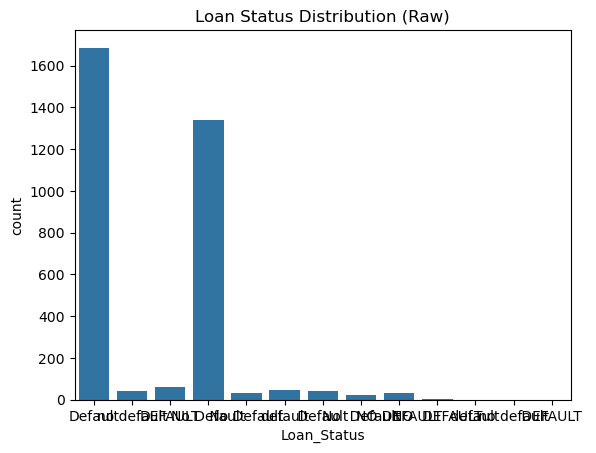

In [183]:
df["Loan_Status"].value_counts(normalize=True)

sns.countplot(x="Loan_Status", data=df) ## Visualize target distribution
plt.title("Loan Status Distribution (Raw)")
plt.show()


# Clean target column (Loan_Status)

#Loan_Status contains inconsistent text formats.
#Standardizing text ensures correct binary mapping.

In [187]:
df["Loan_Status"] = (
    df["Loan_Status"]
    .astype(str)
    .str.lower()
    .str.strip()
    .str.replace(r"\s+", " ", regex=True)
)
# Map target to binary values
# 1 -> Default, 0 -> No Default

df["Loan_Status"] = df["Loan_Status"].map({
    "no default": 0,           
    "default": 1
})  


# Handle missing values

#Separate numerical and categorical columns

In [143]:
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
cat_cols = df.select_dtypes(include=["object"]).columns

df[num_cols] = df[num_cols].fillna(df[num_cols].median())
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

#  Median used for numerical features to reduce effect of outliers
#  Mode used for categorical features as most frequent category




# Feature engineering

#Creating ratio-based features to better represent
#loan affordability and repayment behavior.

In [188]:
df["EMI_to_Income"] = df["EMI"] / df["Monthly_Income"]
df["Loan_to_Income"] = df["Loan_Amount"] / df["Monthly_Income"]
df["Net_Loan"] = df["Loan_Amount"] - df["Down_Payment"]

# Prepare features and target

#Separate predictors and target variable

In [189]:
X = df.drop("Loan_Status", axis=1)
y = df["Loan_Status"]

# Customer_ID and Name are identifiers, not predictive features
X = X.drop(columns=["Customer_ID", "Name"])


# Encode categorical variables

#One-hot encoding converts categorical values
#into numeric format suitable for ML models.

In [190]:
X = pd.get_dummies(X, drop_first=True)

# Train-Test Split

#Stratified split ensures class proportions
#remain similar in train and test sets.

In [156]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


# Feature Scaling

#Scaling is required for Logistic Regression
#Tree-based models do not require scaling

In [191]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Logistic Regression Model

#Acts as a baseline linear model.

In [192]:
lr = LogisticRegression(
    max_iter=1000,
    class_weight="balanced"
)

lr.fit(X_train_scaled, y_train)

# Predicted probabilities for ROC-AUC evaluation
y_prob_lr = lr.predict_proba(X_test_scaled)[:, 1]
print("Logistic Regression ROC-AUC:",
      roc_auc_score(y_test, y_prob_lr))



Logistic Regression ROC-AUC: 0.5464023007577015


# Random Forest Model

#Tree-based ensemble model capable of
#capturing non-linear relationships.

In [194]:
rf = RandomForestClassifier(
    n_estimators=400,
    max_depth=12,
    min_samples_leaf=20,
    class_weight="balanced",
    random_state=42
)

rf.fit(X_train, y_train)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

roc = roc_auc_score(y_test, y_prob_rf)
print(f"Random Forest ROC-AUC: {roc:.3f}")






Random Forest ROC-AUC: 0.565


# XGBoost Model

#Gradient boosting model designed for
#structured tabular data.

In [195]:
xgb = XGBClassifier(
    n_estimators=300,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=y_train.value_counts()[0] / y_train.value_counts()[1],
    eval_metric="auc",
    random_state=42
)

xgb.fit(X_train, y_train)

# Generate predictions using the same test split
y_pred_xgb = xgb.predict(X_test)
y_prob_xgb = xgb.predict_proba(X_test)[:, 1]





In [161]:
print(len(y_test), len(y_prob_xgb))


663 663


# Model comparison

In [196]:

results_df = pd.DataFrame({
"Model": ["Logistic Regression", "Random Forest", "XGBoost"],
"ROC_AUC": [roc_lr, roc_rf, roc_xgb]
}).round(3)


results_df

,Model,ROC_AUC
0,Logistic Regression,0.546
1,Random Forest,0.565
2,XGBoost,0.541


# Model evaluation (XGBoost)

<Axes: >

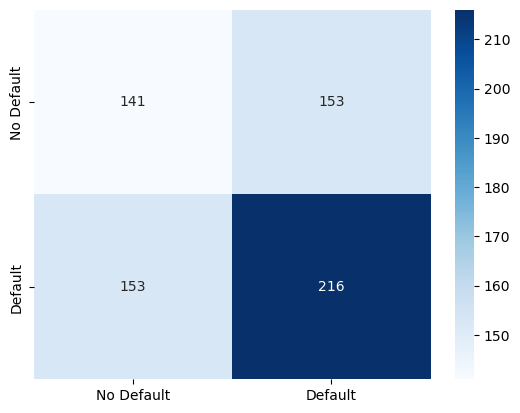

In [165]:
#Confusion Matrix
sns.heatmap(
    confusion_matrix(y_test, y_pred_xgb),
    annot=True, fmt="d", cmap="Blues",
    xticklabels=["No Default", "Default"],
    yticklabels=["No Default", "Default"]
)



In [197]:
# Detailed classification metrics
print(classification_report(y_test, y_pred_xgb))



              precision    recall  f1-score   support

           0       0.48      0.48      0.48       294
           1       0.59      0.59      0.59       369

    accuracy                           0.54       663
   macro avg       0.53      0.53      0.53       663
weighted avg       0.54      0.54      0.54       663



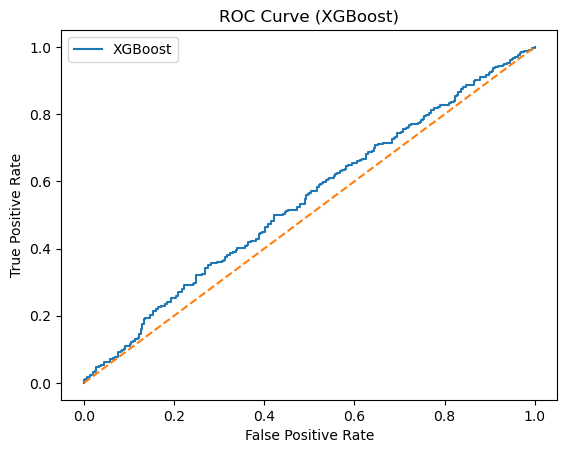

In [198]:
#ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob_xgb)

plt.plot(fpr, tpr, label="XGBoost")
plt.plot([0, 1], [0, 1], "--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (XGBoost)")
plt.legend()
plt.show()



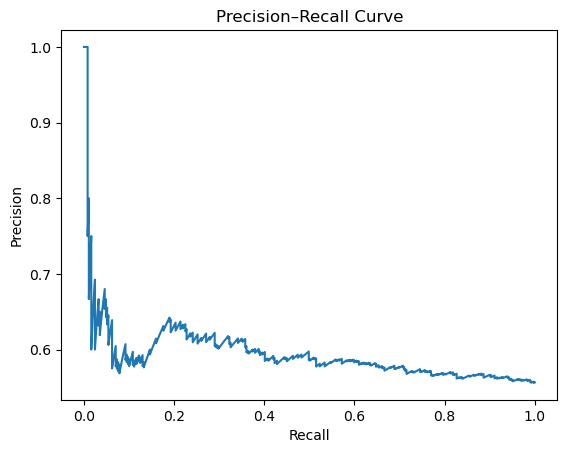

In [168]:
#Precision–Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob_xgb)

plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve")
plt.show()



# Feature importance

#Identifies which features contribute
#most to model predictions.

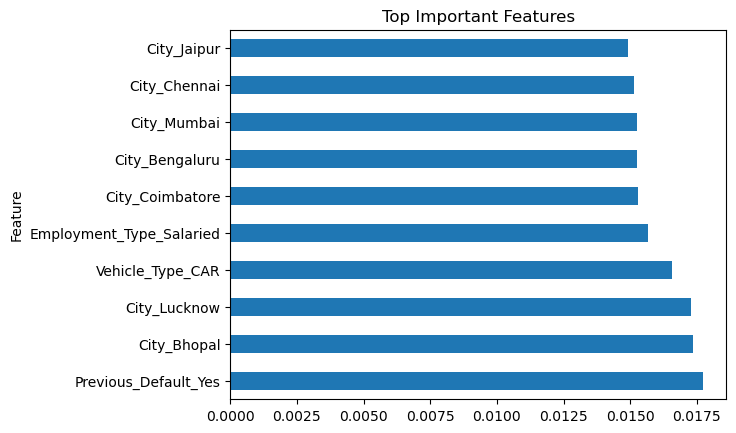

In [169]:

feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": xgb.feature_importances_
}).sort_values(by="Importance", ascending=False)

feature_importance.head(10).plot(
    kind="barh",
    x="Feature",
    y="Importance",
    legend=False
)
plt.title("Top Important Features")
plt.show()



Conclusion: 


In this project, different machine learning models were used to predict vehicle loan default.
The model performance is moderate, which is expected because customer repayment behavior is complex and often overlaps.
Instead of focusing only on accuracy, ROC-AUC was used since it better measures how well the model separates defaulters from non-defaulters.
Overall, the project demonstrates a complete machine learning workflow from data cleaning to model evaluation and business interpretation.